In [2]:
#comenzamos con el EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
#una nube de palabras con las palabras más frecuentes en los títulos de las películas.
#este consiste en recomendar películas a los usuarios basándose en películas similares, 
# por lo que se debe encontrar la similitud de puntuación entre esa película y el resto de películas, 
# se ordenarán según el score de similaridad y devolverá una lista de Python con 5 valores, 
# cada uno siendo el string del nombre de las películas con mayor puntaje, en orden descendente. 
# Debe ser deployado como una función adicional de la API anterior y debe llamarse:
#def recomendacion( titulo ): Se ingresa el nombre de una película y te recomienda las similares en una lista de 5 valores.


In [3]:
data = pd.read_csv("./Dataset/datosMoviesPI01.csv", encoding='latin-1')

tablas para diferenciar entre datos categóricos y cuantitativos
gráfica
Checar duplicados
Ver las películas con el mismo nombre
En los datos cuantitativos ver promedios, desviaciones estándar, etc
Revisar los outliers
Generar una nube de palabras
Y hacer gráficas de lo que creas necesario

In [4]:
data.shape

(45376, 22)

In [5]:
data.head(5)

,budget,genres,id,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,...,title,vote_average,vote_count,id.1,release_year,return,franquicia,productoras,paises,directores
0,30000000,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,Toy Story,7.7,5415.0,862,1995,12.451801,Toy Story Collection,['Pixar Animation Studios'],['United States of America'],['John Lasseter']
1,65000000,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,Jumanji,6.9,2413.0,8844,1995,4.043035,NaN,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],['Joe Johnston']
2,0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,Grumpier Old Men,6.5,92.0,15602,1995,0.000000,Grumpy Old Men Collection,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],['Howard Deutch']
3,16000000,"['Comedy', 'Drama', 'Romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,Waiting to Exhale,6.1,34.0,31357,1995,5.090760,NaN,['Twentieth Century Fox Film Corporation'],['United States of America'],['Forest Whitaker']
4,0,['Comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,Father of the Bride Part II,5.7,173.0,11862,1995,0.000000,Father of the Bride Collection,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],['Charles Shyer']


In [6]:
data.columns

Index(['budget', 'genres', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'vote_average', 'vote_count', 'id.1',
       'release_year', 'return', 'franquicia', 'productoras', 'paises',
       'directores'],
      dtype='object')

In [7]:
data.dtypes

budget                 int64
genres                object
id                     int64
original_language     object
overview              object
popularity           float64
release_date          object
revenue              float64
runtime              float64
spoken_languages      object
status                object
tagline               object
title                 object
vote_average         float64
vote_count           float64
id.1                   int64
release_year           int64
return               float64
franquicia            object
productoras           object
paises                object
directores            object
dtype: object

In [8]:
#ver medidas 
data.describe(include='all') 

,budget,genres,id,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,...,title,vote_average,vote_count,id.1,release_year,return,franquicia,productoras,paises,directores
count,4.537600e+04,45376,45376.000000,45365,44430,45376.000000,45376,4.537600e+04,45130.000000,45376,...,45376,45376.000000,45376.000000,45376.000000,45376.000000,4.537600e+04,4488,45376,45376,45376
unique,NaN,4065,NaN,89,44231,NaN,17333,NaN,NaN,1931,...,42190,NaN,NaN,NaN,NaN,NaN,1695,22666,2389,18817
top,NaN,['Drama'],NaN,en,No overview found.,NaN,2008-01-01,NaN,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",...,Cinderella,NaN,NaN,NaN,NaN,NaN,The Bowery Boys,[],['United States of America'],[]
freq,NaN,4998,NaN,32202,133,NaN,136,NaN,NaN,22380,...,11,NaN,NaN,NaN,NaN,NaN,29,11796,17846,874
mean,4.232604e+06,NaN,108027.103094,NaN,NaN,2.926458,NaN,1.123010e+07,94.181675,NaN,...,NaN,5.624070,110.096439,108157.429544,1991.881193,6.600428e+02,NaN,NaN,NaN,NaN
std,1.743986e+07,NaN,112168.377996,NaN,NaN,6.009672,NaN,6.438996e+07,38.341059,NaN,...,NaN,1.915423,491.742894,112331.928555,24.055360,7.469329e+04,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,2.000000,NaN,NaN,0.000000,NaN,0.000000e+00,0.000000,NaN,...,NaN,0.000000,0.000000,2.000000,1874.000000,0.000000e+00,NaN,NaN,NaN,NaN
25%,0.000000e+00,NaN,26385.750000,NaN,NaN,0.388840,NaN,0.000000e+00,85.000000,NaN,...,NaN,5.000000,3.000000,26377.500000,1978.000000,0.000000e+00,NaN,NaN,NaN,NaN
50%,0.000000e+00,NaN,59857.500000,NaN,NaN,1.130454,NaN,0.000000e+00,95.000000,NaN,...,NaN,6.000000,10.000000,59866.000000,2001.000000,0.000000e+00,NaN,NaN,NaN,NaN
75%,0.000000e+00,NaN,156533.500000,NaN,NaN,3.691695,NaN,0.000000e+00,107.000000,NaN,...,NaN,6.800000,34.000000,156965.500000,2010.000000,0.000000e+00,NaN,NaN,NaN,NaN


**Preparacion de los datos**  
Eliminamos columnas y fila irrelevantes  
Identificamos columnas redundantes  
Renombramos Columnas  
Chequeamos tipos de datos de cada columna  
Chequeamos nulos
Chequeamos duplicados
Feature Creation


In [9]:
data.drop(['id', 'id.1'], axis=1, inplace=True)

In [10]:
data['franquicia'] = data['franquicia'].astype(str)

In [11]:
data.dtypes

budget                 int64
genres                object
original_language     object
overview              object
popularity           float64
release_date          object
revenue              float64
runtime              float64
spoken_languages      object
status                object
tagline               object
title                 object
vote_average         float64
vote_count           float64
release_year           int64
return               float64
franquicia            object
productoras           object
paises                object
directores            object
dtype: object

In [12]:
data.isna().sum()

budget                   0
genres                   0
original_language       11
overview               946
popularity               0
release_date             0
revenue                  0
runtime                246
spoken_languages         0
status                  80
tagline              24979
title                    0
vote_average             0
vote_count               0
release_year             0
return                   0
franquicia               0
productoras              0
paises                   0
directores               0
dtype: int64

In [13]:
data.loc[data.duplicated()]

,budget,genres,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,franquicia,productoras,paises,directores
1463,0,"['Drama', 'Romance']",de,"East-Berlin, 1961, shortly after the erection ...",0.122178,1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,5.0,1.0,1995,0.0,nan,"['Studio Babelsberg', 'Centre National de la C...",['Germany'],['Margarethe von Trotta']
9160,0,"['Crime', 'Drama', 'Thriller']",fr,Hitman Jef Costello is a perfectionist who alw...,9.091288,1967-10-25,39481.0,105.0,"[{'iso_639_1': 'fr', 'name': 'FranÃ§ais'}]",Released,There is no solitude greater than that of the ...,Le SamouraÃ¯,7.9,187.0,1967,0.0,nan,"['Fida cinematografica', 'Compagnie Industriel...","['France', 'Italy']",['Jean-Pierre Melville']
9322,0,"['Adventure', 'Animation', 'Drama', 'Action', ...",en,"In feudal India, a warrior (Khan) who renounce...",1.967992,2001-09-23,0.0,86.0,"[{'iso_639_1': 'hi', 'name': '??????'}]",Released,NaN,The Warrior,6.3,15.0,2001,0.0,nan,['Filmfour'],"['France', 'Germany', 'India', 'United Kingdom']",['Asif Kapadia']
13370,0,"['Thriller', 'Mystery']",fi,Recovering from a nail gun shot to the head an...,0.411949,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,6.7,3.0,2008,0.0,nan,['Filmiteollisuus Fine'],['Finland'],['JP Siili']
16757,0,"['Thriller', 'Mystery']",fi,Recovering from a nail gun shot to the head an...,0.411949,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,6.7,3.0,2008,0.0,nan,['Filmiteollisuus Fine'],['Finland'],['JP Siili']


Se identifican dos filas duplicadas. Al contener exactamente los mismos valores se decide eliminar la ultima.

In [14]:
data.drop(16757, inplace=True)

In [15]:
data.loc[data.duplicated()]

,budget,genres,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,franquicia,productoras,paises,directores
1463,0,"['Drama', 'Romance']",de,"East-Berlin, 1961, shortly after the erection ...",0.122178,1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,5.0,1.0,1995,0.0,nan,"['Studio Babelsberg', 'Centre National de la C...",['Germany'],['Margarethe von Trotta']
9160,0,"['Crime', 'Drama', 'Thriller']",fr,Hitman Jef Costello is a perfectionist who alw...,9.091288,1967-10-25,39481.0,105.0,"[{'iso_639_1': 'fr', 'name': 'FranÃ§ais'}]",Released,There is no solitude greater than that of the ...,Le SamouraÃ¯,7.9,187.0,1967,0.0,nan,"['Fida cinematografica', 'Compagnie Industriel...","['France', 'Italy']",['Jean-Pierre Melville']
9322,0,"['Adventure', 'Animation', 'Drama', 'Action', ...",en,"In feudal India, a warrior (Khan) who renounce...",1.967992,2001-09-23,0.0,86.0,"[{'iso_639_1': 'hi', 'name': '??????'}]",Released,NaN,The Warrior,6.3,15.0,2001,0.0,nan,['Filmfour'],"['France', 'Germany', 'India', 'United Kingdom']",['Asif Kapadia']
13370,0,"['Thriller', 'Mystery']",fi,Recovering from a nail gun shot to the head an...,0.411949,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,6.7,3.0,2008,0.0,nan,['Filmiteollisuus Fine'],['Finland'],['JP Siili']


In [16]:
#duplicados_title = data['title'].duplicated().any()
data.loc[data.duplicated(subset=['title'])]


,budget,genres,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,franquicia,productoras,paises,directores
886,2238813,"['Comedy', 'Drama', 'Romance']",en,Linus and David Larrabee are the two sons of a...,7.359741,1954-09-28,10000000.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,...the chauffeur's daughter who learned her st...,Sabrina,7.4,284.0,1954,4.466653,nan,['Paramount Pictures'],['United States of America'],['Billy Wilder']
928,0,['Drama'],en,"In Puritan Boston, seamstress Hester Prynne is...",0.284522,1926-08-09,0.0,115.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Scarlet Letter,8.3,4.0,1926,0.000000,nan,['Metro-Goldwyn-Mayer (MGM)'],['United States of America'],['Victor SjÃÂ¶strÃÂ¶m']
1294,0,"['Drama', 'Thriller']",en,Sam Bowden witnesses a rape committed by Max C...,7.583191,1962-04-12,0.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Now he had only one weapon left - murder! ...T...,Cape Fear,7.2,125.0,1962,0.000000,nan,['Melville-Talbot Productions'],['United States of America'],['J. Lee Thompson']
1463,0,"['Drama', 'Romance']",de,"East-Berlin, 1961, shortly after the erection ...",0.122178,1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,5.0,1.0,1995,0.000000,nan,"['Studio Babelsberg', 'Centre National de la C...",['Germany'],['Margarethe von Trotta']
1642,80000000,"['Drama', 'Adventure']",en,"In 2013 there are no highways, no I-ways, no d...",6.537407,1997-12-25,17626234.0,177.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The year is 2013. One man walked in off the ho...,The Postman,6.1,306.0,1997,0.220328,The Postman Collection,"['Tig Productions', 'Warner Bros.']",['United States of America'],['Kevin Costner']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45332,0,"['Drama', 'Foreign']",zh,Little pocket thief Wu never got away from the...,0.350365,1997-01-01,0.0,105.0,"[{'iso_639_1': 'zh', 'name': '???'}]",Released,NaN,Pickpocket,7.2,13.0,1997,0.000000,nan,"['Hu Tong Communications', 'Radiant Advertisin...","['China', 'Hong Kong']",['Anton Sivers']
45364,0,"['Crime', 'Drama', 'Thriller']",hi,The bliss of a biology teacherÂs family life ...,1.559596,2017-07-07,0.0,146.0,"[{'iso_639_1': 'hi', 'name': '??????'}]",Released,NaN,Mom,6.6,14.0,2017,0.000000,nan,"['Mad Films', 'Third Eye Pictures']",['India'],['Georges MÃÂ©liÃÂ¨s']
45365,0,"['Comedy', 'Drama']",en,The Morning After is a feature film that consi...,0.139936,2015-01-11,0.0,79.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What happened last night?,The Morning After,4.0,2.0,2015,0.000000,nan,"['Oops Doughnuts Productions', 'He and She Fil...",['United States of America'],['Georges MÃÂ©liÃÂ¨s']
45371,0,"['Drama', 'Action', 'Romance']",en,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Robin Hood,5.7,26.0,1991,0.000000,nan,"['Westdeutscher Rundfunk (WDR)', 'Working Titl...","['Canada', 'Germany', 'United Kingdom', 'Unite...",['Georges MÃÂ©liÃÂ¨s']


In [17]:
data.query('title == "Sabrina"')

,budget,genres,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,franquicia,productoras,paises,directores
6,58000000,"['Comedy', 'Romance']",en,An ugly duckling having undergone a remarkable...,6.677277,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'FranÃ§ais'}, {'i...",Released,You are cordially invited to the most surprisi...,Sabrina,6.2,141.0,1995,0.000000,nan,"['Paramount Pictures', 'Scott Rudin Production...","['Germany', 'United States of America']",['Sydney Pollack']
886,2238813,"['Comedy', 'Drama', 'Romance']",en,Linus and David Larrabee are the two sons of a...,7.359741,1954-09-28,10000000.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,...the chauffeur's daughter who learned her st...,Sabrina,7.4,284.0,1954,4.466653,nan,['Paramount Pictures'],['United States of America'],['Billy Wilder']


Encontramos 3185 duplicados por Titulo de pelicula. Se decide dejarlos en la base porque pueden ser releases diferentes.

Analizamos las diferentes variables.

Realizamos una nube de palabras con las palabras más frecuentes en los títulos de las películas.

In [28]:
#instalo la librería stylecloud
! pip install stylecloud


                                              0.0/262.1 kB ? eta -:--:--
     -------------                           92.2/262.1 kB 2.6 MB/s eta 0:00:01
     --------------------------------       225.3/262.1 kB 2.8 MB/s eta 0:00:01
     -------------------------------------- 262.1/262.1 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
                                              0.0/152.1 kB ? eta -:--:--
     ------------------------------         122.9/152.1 kB 3.6 MB/s eta 0:00:01
     -------------------------------------- 152.1/152.1 kB 3.0 MB/s eta 0:00:00
                                              0.0/161.4 kB ? eta -:--:--
     --------------------------             112.6/1

In [22]:
texto = data['title'].astype(str)
texto.head(5)

0                      Toy Story
1                        Jumanji
2               Grumpier Old Men
3              Waiting to Exhale
4    Father of the Bride Part II
Name: title, dtype: object

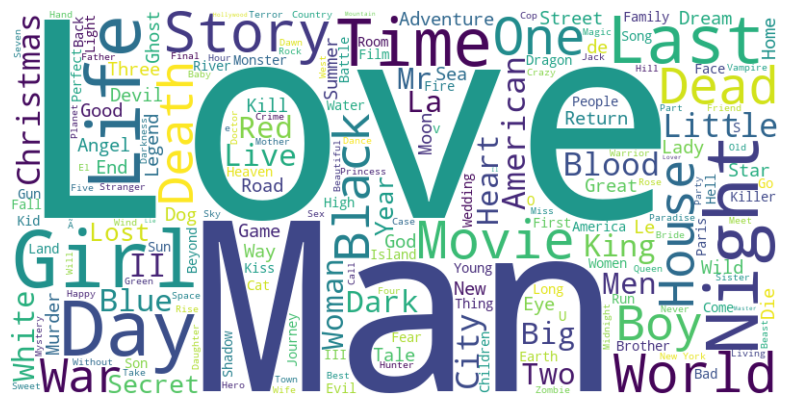

In [28]:
from wordcloud import WordCloud


# Crear un DataFrame de ejemplo con los títulos de las películas
dataTitulos = data['title']

# Concatenar los títulos en un único string
texto = ' '.join(dataTitulos)

# Crear el objeto WordCloud con la configuración deseada
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

# Mostrar el gráfico de nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
texto = data['title'].astype(str).tolist()
texto

['Toy Story',
 'Jumanji',
 'Grumpier Old Men',
 'Waiting to Exhale',
 'Father of the Bride Part II',
 'Heat',
 'Sabrina',
 'Tom and Huck',
 'Sudden Death',
 'GoldenEye',
 'The American President',
 'Dracula: Dead and Loving It',
 'Balto',
 'Nixon',
 'Cutthroat Island',
 'Casino',
 'Sense and Sensibility',
 'Four Rooms',
 'Ace Ventura: When Nature Calls',
 'Money Train',
 'Get Shorty',
 'Copycat',
 'Assassins',
 'Powder',
 'Leaving Las Vegas',
 'Othello',
 'Now and Then',
 'Persuasion',
 'The City of Lost Children',
 'Shanghai Triad',
 'Dangerous Minds',
 'Twelve Monkeys',
 'Wings of Courage',
 'Babe',
 'Carrington',
 'Dead Man Walking',
 'Across the Sea of Time',
 'It Takes Two',
 'Clueless',
 'Cry, the Beloved Country',
 'Richard III',
 'Dead Presidents',
 'Restoration',
 'Mortal Kombat',
 'To Die For',
 'How To Make An American Quilt',
 'Se7en',
 'Pocahontas',
 'When Night Is Falling',
 'The Usual Suspects',
 'Guardian Angel',
 'Mighty Aphrodite',
 'Lamerica',
 'The Big Green',
 'Geo

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45375 entries, 0 to 45375
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             45375 non-null  int64  
 1   genres             45375 non-null  object 
 2   original_language  45364 non-null  object 
 3   overview           44429 non-null  object 
 4   popularity         45375 non-null  float64
 5   release_date       45375 non-null  object 
 6   revenue            45375 non-null  float64
 7   runtime            45129 non-null  float64
 8   spoken_languages   45375 non-null  object 
 9   status             45295 non-null  object 
 10  tagline            20396 non-null  object 
 11  title              45375 non-null  object 
 12  vote_average       45375 non-null  float64
 13  vote_count         45375 non-null  float64
 14  release_year       45375 non-null  int64  
 15  return             45375 non-null  float64
 16  franquicia         45375 no

### **`SIMILITUD`**

La pregunta que debemos responder ahora es, ¿cómo determinamos similitud?¿Con qué criterio establecemos que dos artículos, por ejemplo, son similares entre sí?

Este concepto está muy relacionado con la **distancia**.

#### ***Similitud coseno***

Una de las formas de obtener esta característica, entre ítems o usuarios, es con la `similitud coseno`. Esta estrategia determina la similaridad según el ángulo del vector.

Básicamente, esto podría ser muy útil para tomar un documento en particular, o en nuestro caso, el título de una película, y encontrar aquellos que son similares. En este caso, intentemos obtener una referencia directa a otra película similar según cada título.

In [211]:
#importamos las librerias necesarias
import pandas as pd
import sklearn as sk
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [236]:
df_similitud_titulos = []
#***************************
data['title'] = data['title'].apply(str.strip)
data['title'] = data['title'].replace(':', '')
data['title'] = data['title'].replace('-', '')
#*********************************************




In [239]:
#Reduzco el dataset por falta de memoria al momento de guardar el array
df_reducido = data.head(5000)
df_similitud_titulos = df_reducido['title'].tolist()

In [195]:
#dataTitle = data['title']
#dataTitle.isna().sum()

0

In [240]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True)
df_similitud_titulos2 = tfidf_vectorizer.fit_transform(df_similitud_titulos)
df_tfidf = pd.DataFrame(df_similitud_titulos2.toarray(),columns=tfidf_vectorizer.get_feature_names_out())
df_tfidf

,000,10,100,101,102,10th,110th,12,13,13th,...,zeus,zhivago,ziegfeld,zoe,zola,zone,zoolander,zorro,zulu,â½
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Filtramos y descartamos los valores 0 porque marcan la similitud al mismo item, quedandonos con los resultados relevantes.    Ordenamos en forma descendente. Mostrando el mejor resultado en la cima.

In [241]:
#se debe ingresar el título todo en minúscula
titulo_buscar = 'Toy Story'
titulo_buscar = titulo_buscar.lower()

In [242]:
palabras_clave = titulo_buscar.split()
columnas_df = [df_tfidf[palabra] for palabra in palabras_clave]
columnas_df.append(sum(columnas_df))
etiquetas_filas = palabras_clave + [" + ".join(palabras_clave)]

search_df = pd.DataFrame(columnas_df, index=etiquetas_filas).T

In [244]:
# Referencia a la última columna
ultima_columna = etiquetas_filas[len(etiquetas_filas) - 1]
#anteultima_columna = etiquetas_filas[len(etiquetas_filas) - 2]
#antepenultima_columna = etiquetas_filas[len(etiquetas_filas) - 3]

In [201]:
#anteultima_columna

'wars'

In [245]:
search_df = search_df[search_df[ultima_columna] > 0]
#**********************************************
#search_df = search_df[search_df[anteultima_columna] > 0]
#search_df = search_df[search_df[antepenultima_columna] > 0]
#******************************************************
search_df
test = search_df.sort_values([ultima_columna], ascending=[False])
test

,toy,story,toy + story
0,0.810332,0.585972,1.396303
2995,0.810332,0.585972,1.396303
4795,1.000000,0.000000,1.000000
2843,0.000000,1.000000,1.000000
1997,0.000000,1.000000,1.000000
4164,0.000000,0.743831,0.743831
3545,0.000000,0.636784,0.636784
1836,0.000000,0.636784,0.636784
2687,0.000000,0.636784,0.636784
2734,0.000000,0.605627,0.605627


In [246]:
ranking5 = test.head(5)
ranking5

,toy,story,toy + story
0,0.810332,0.585972,1.396303
2995,0.810332,0.585972,1.396303
4795,1.000000,0.000000,1.000000
2843,0.000000,1.000000,1.000000
1997,0.000000,1.000000,1.000000


In [247]:
ranking5.shape[1]
df_similitud_titulos[256]

'Star Wars'

In [248]:
#buscar el nombre de las 5 peliculas más similares a la ingresada 
peliculas_recomendadas = []
recomendadas = ranking5.index
peliculas_recomendadas = [df_similitud_titulos[indice] for indice in recomendadas]

peliculas_recomendadas

['Toy Story', 'Toy Story 2', 'The Toy', 'The Story of Us', 'L.A. Story']